In [3]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
k = 4
np.random.seed(42)

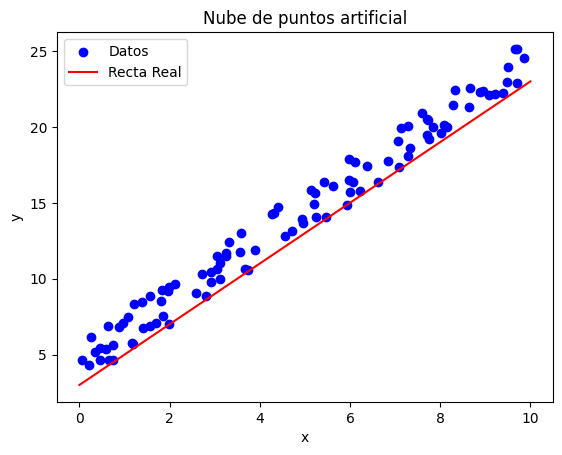

In [4]:
m = 100 #100 puntos
#Generar los valores aleatorios de x entre 0 y 10
x = np.random.rand(m)* 10

#slope & interception
a = 2
b = 3

#Maximas iteraciones
iteraciones_max = 200

sigma = 3 #ruido

y = a*x + b + np.random.rand(m) * sigma

#graficar los datos solo para verlos
plt.scatter(x,y, color='blue', label='Datos')
plt.plot([0,10], [b,a*10+b], color='red', label='Recta Real')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nube de puntos artificial')
plt.legend()
plt.show()

In [5]:
#INICIALIZACIÓN DE CENTROIDES
i=1
centroides = []#Lista de centroides
while i <= k:
    value = random.randint(0,len(x)-1) #1 punto al azar de los 100 que tenemos
    centroides.append([x[value],y[value]])#agregar el punto al diccionario
    i += 1

#Lógica para no repetir centroides

#print centroides
for centroide in centroides:
    print(centroide[0], centroide[1])


3.567533266935893 11.742390586096061
4.4015249373960135 14.718396122954909
9.218742350231167 22.163650514996835
5.227328293819941 15.632523624250599


In [6]:
def Calcular_distancia(x_punto,y_punto, centroides,k):
    distancias = []
    i = 0
    while i < k:
        distancia = (x_punto - centroides[i][0])**2 + (y_punto - centroides[i][1])**2
        distancia = math.sqrt(distancia)
        distancias.append(distancia)
        i += 1
    
    
    
    minima = min(distancias)
    cluster_escogido = distancias.index(minima) 
    return cluster_escogido

def Calcular_distancia_centroides(centroides_antiguos, centroides,k):
    distancias = []
    i = 0
    while i < k:
        distancia = (centroides_antiguos[i][0] - centroides[i][0])**2 + (centroides_antiguos[i][1] - centroides[i][1])**2
        distancia = math.sqrt(distancia)
        distancias.append(distancia)
        i += 1
    return distancias

In [7]:
#Crear lista de clusters
Clusters = []
i=0
while i < k:
    cluster = [] #Lista de los puntos que se añaden al grupo
    Clusters.append(cluster)
    i += 1
#Añadir puntos a clusters
def Hacer_Clusters(coordenadas_x,coordenadas_y,centroides, Clusters):
    i = 0
    while i < len(coordenadas_x):
        punto = [coordenadas_x[i],coordenadas_y[i]]
        cluster_escogido = Calcular_distancia(coordenadas_x[i],coordenadas_y[i], centroides,k)
        Clusters[cluster_escogido].append(punto)
        i += 1


    

In [8]:
#Recalcular centroides
for centroide in centroides:
    print(centroide[0], centroide[1])

print('______________')

def Recalcular_Centroides(k, Clusters, centroides):
    suma_x = 0
    suma_y = 0
    i = 0
    centroides_antiguos = [c[:] for c in centroides]
    while i < k:
        j = 0
        suma_x=0
        suma_y=0
        while j < len(Clusters[i]):
            suma_x += Clusters[i][j][0]
            suma_y += Clusters[i][j][1]
            j+=1
        if len(Clusters[i]) != 0:
            centroides[i][0] = suma_x/(len(Clusters[i]))
            centroides[i][1] = suma_y/(len(Clusters[i]))
        else:
            value = random.randint(0,len(x)-1)
            centroides[i] = [x[value],y[value]]
            
        i+=1
    Distancias_Clusters=Calcular_distancia_centroides(centroides_antiguos, centroides, k)
    continue_bool = any(dist > 0.001 for dist in Distancias_Clusters)
    return continue_bool
    


for centroide in centroides:
    print(centroide[0], centroide[1])




3.567533266935893 11.742390586096061
4.4015249373960135 14.718396122954909
9.218742350231167 22.163650514996835
5.227328293819941 15.632523624250599
______________
3.567533266935893 11.742390586096061
4.4015249373960135 14.718396122954909
9.218742350231167 22.163650514996835
5.227328293819941 15.632523624250599


In [9]:
def k_means(k,Clusters,centroides,x_punto,y_punto,iteraciones_max):
    i = 0
    continue_bool = True
    while i < iteraciones_max and continue_bool is True:
        for cluster in Clusters:
            cluster.clear()
        Hacer_Clusters(x_punto, y_punto, centroides, Clusters)
        continue_bool = Recalcular_Centroides(k, Clusters,centroides)
        print(f"Iteración {i+1}:")
        for c in centroides:
            print(c)
        i+=1


In [10]:
k_means(k,Clusters,centroides,x,y,iteraciones_max)

Iteración 1:
[np.float64(1.9558416649471957), np.float64(8.410330350395249)]
[np.float64(4.790365841691743), np.float64(14.021610800622742)]
[np.float64(8.498572919474084), np.float64(21.587650243544967)]
[np.float64(6.13732164257539), np.float64(16.63255745853626)]
Iteración 2:
[np.float64(1.6273937373090355), np.float64(7.662019341024512)]
[np.float64(4.327997507299902), np.float64(13.245455768648887)]
[np.float64(8.553572899512465), np.float64(21.684380435674363)]
[np.float64(6.259737476731451), np.float64(16.981185543515068)]
Iteración 3:
[np.float64(1.4256025051718293), np.float64(7.3104202844018955)]
[np.float64(4.073908453181723), np.float64(12.69062382917787)]
[np.float64(8.553572899512465), np.float64(21.684380435674363)]
[np.float64(6.2410934885030604), np.float64(16.86385011158837)]
Iteración 4:
[np.float64(1.286265085754313), np.float64(7.034522843113787)]
[np.float64(3.873347923561482), np.float64(12.276247038865984)]
[np.float64(8.553572899512465), np.float64(21.684380435

<h2>ELBOW Method</h2>
Para calcular el <b>numero de clusters</b> en nuestro algoritmo

In [15]:
#Clusters -> cluster -> puntos del cluster
def Calcular_WCSS(Clusters, centroides):
    sse = 0
    for i,cluster in enumerate(Clusters):
        for punto in cluster:
            distancia = (punto[0] - centroides[i][0])**2 + (punto[1] - centroides[i][1])**2
            sse+= distancia
    return sse

distancias = Calcular_WCSS(Clusters, centroides)
print(distancias)

301.4745294777123


In [16]:
sse = []
for i in range (1,16):
    k=i
    Clusters = [[] for _ in range(k)]
    centroides = [[random.choice(x), random.choice(y)] for _ in range(k)]
    
    k_means(k,Clusters,centroides,x,y,iteraciones_max)
    distancia = Calcular_WCSS(Clusters, centroides)
    sse.append(distancia)


Iteración 1:
[np.float64(4.701807433782093), np.float64(13.897110037029261)]
Iteración 2:
[np.float64(4.701807433782093), np.float64(13.897110037029261)]
Iteración 1:
[np.float64(2.629218894697314), np.float64(9.740750950154444)]
[np.float64(7.810690242409263), np.float64(20.13164866734146)]
Iteración 2:
[np.float64(2.4187172356755404), np.float64(9.327996613692884)]
[np.float64(7.607558595008616), np.float64(19.712345303093723)]
Iteración 3:
[np.float64(2.3681360906554936), np.float64(9.226516597701066)]
[np.float64(7.554072408714604), np.float64(19.605613129541478)]
Iteración 4:
[np.float64(2.33048074164178), np.float64(9.12481512501118)]
[np.float64(7.485538768033766), np.float64(19.499369281572207)]
Iteración 5:
[np.float64(2.2712991934947797), np.float64(9.031158017169588)]
[np.float64(7.442593321765661), np.float64(19.384247421126318)]
Iteración 6:
[np.float64(2.2140633257480955), np.float64(8.934548771167027)]
[np.float64(7.396863550818925), np.float64(19.273218075046664)]
Itera

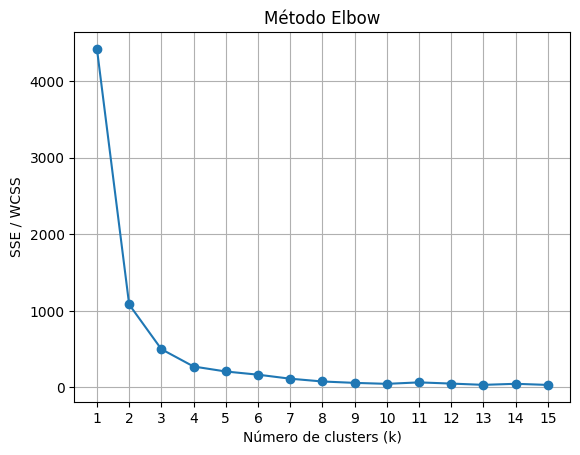

In [17]:
import matplotlib.pyplot as plt

plt.plot(range(1, 16), sse, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('SSE / WCSS')
plt.title('Método Elbow')
plt.xticks(range(1, 16))
plt.grid(True)
plt.show()



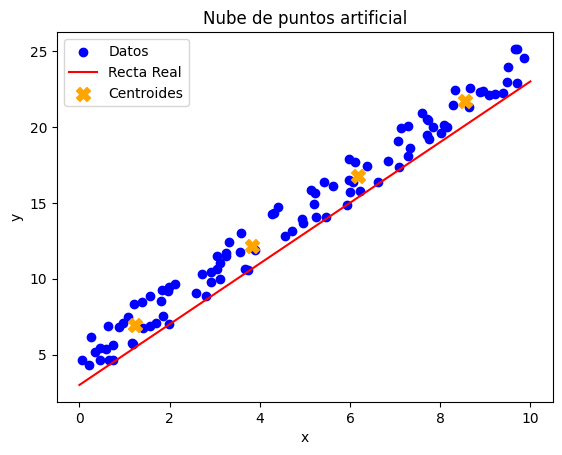

In [13]:
#Graficar el data set con centroides ya finalizados
plt.scatter(x,y, color='blue', label='Datos')
plt.plot([0,10], [b,a*10+b], color='red', label='Recta Real')
centroides_x = [c[0] for c in centroides]
centroides_y = [c[1] for c in centroides]
plt.scatter(centroides_x, centroides_y, color='orange', s=100, marker='X', label='Centroides')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nube de puntos artificial')
plt.legend()
plt.show()